In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [25]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [26]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [27]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [28]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [29]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [30]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | mtimbira
Processing Record 4 of Set 1 | norman wells
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | dikson
Processing Record 7 of Set 1 | hasaki
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 1 | komsomolskiy
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | mian channun
Processing Record 15 of Set 1 | thaba-tseka
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | anadyr
Processing Record 18 of Set 1 | tripoli
Processing Record 19 of Set 1 | pop
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1 | doka
Processing Record 23 of Set 1 | troi

Processing Record 28 of Set 4 | lima
Processing Record 29 of Set 4 | saleaula
City not found. Skipping...
Processing Record 30 of Set 4 | deputatskiy
Processing Record 31 of Set 4 | ardon
Processing Record 32 of Set 4 | kavieng
Processing Record 33 of Set 4 | lithgow
Processing Record 34 of Set 4 | dwarka
Processing Record 35 of Set 4 | sabang
Processing Record 36 of Set 4 | robertsport
Processing Record 37 of Set 4 | alofi
Processing Record 38 of Set 4 | quime
Processing Record 39 of Set 4 | goundam
Processing Record 40 of Set 4 | marcona
City not found. Skipping...
Processing Record 41 of Set 4 | fairbanks
Processing Record 42 of Set 4 | bosaso
Processing Record 43 of Set 4 | magelang
Processing Record 44 of Set 4 | kulhudhuffushi
Processing Record 45 of Set 4 | isangel
Processing Record 46 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 47 of Set 4 | insar
Processing Record 48 of Set 4 | verkhoyansk
Processing Record 49 of Set 4 | semey
Processing Record 50 of Set

Processing Record 18 of Set 8 | roald
Processing Record 19 of Set 8 | ishinomaki
Processing Record 20 of Set 8 | berbera
Processing Record 21 of Set 8 | touros
Processing Record 22 of Set 8 | genhe
Processing Record 23 of Set 8 | dutlwe
Processing Record 24 of Set 8 | nichinan
Processing Record 25 of Set 8 | ratnagiri
Processing Record 26 of Set 8 | pocone
Processing Record 27 of Set 8 | maldonado
Processing Record 28 of Set 8 | katherine
Processing Record 29 of Set 8 | gambo
Processing Record 30 of Set 8 | wanning
Processing Record 31 of Set 8 | santa vitoria do palmar
Processing Record 32 of Set 8 | balikpapan
Processing Record 33 of Set 8 | cidreira
Processing Record 34 of Set 8 | yerbogachen
Processing Record 35 of Set 8 | faya
Processing Record 36 of Set 8 | loyga
Processing Record 37 of Set 8 | mocambique
City not found. Skipping...
Processing Record 38 of Set 8 | codrington
Processing Record 39 of Set 8 | corning
Processing Record 40 of Set 8 | bacuit
City not found. Skipping...

Processing Record 7 of Set 12 | kenai
Processing Record 8 of Set 12 | vao
Processing Record 9 of Set 12 | taloqan
Processing Record 10 of Set 12 | sarangani
Processing Record 11 of Set 12 | revelstoke
Processing Record 12 of Set 12 | tagusao
Processing Record 13 of Set 12 | doha
Processing Record 14 of Set 12 | madimba
Processing Record 15 of Set 12 | irbeyskoye
Processing Record 16 of Set 12 | teknaf
Processing Record 17 of Set 12 | gbadolite
Processing Record 18 of Set 12 | omboue
Processing Record 19 of Set 12 | port hawkesbury
Processing Record 20 of Set 12 | sisimiut
Processing Record 21 of Set 12 | ouadda
Processing Record 22 of Set 12 | havoysund
Processing Record 23 of Set 12 | alepe
Processing Record 24 of Set 12 | bjornevatn
Processing Record 25 of Set 12 | ust-nera
Processing Record 26 of Set 12 | ambilobe
Processing Record 27 of Set 12 | maksatikha
Processing Record 28 of Set 12 | dossor
Processing Record 29 of Set 12 | ginir
Processing Record 30 of Set 12 | nurota
Processi

In [42]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,65.17,41,1,1.19,US,2022-05-12 00:45:52
1,Bethel,41.3712,-73.4140,70.63,81,1,3.83,US,2022-05-12 00:48:56
2,Mtimbira,-8.7833,36.3500,66.74,85,2,1.97,TZ,2022-05-12 00:49:03
3,Norman Wells,65.2820,-126.8329,50.04,37,40,4.61,CA,2022-05-12 00:49:03
4,Punta Arenas,-53.1500,-70.9167,42.91,81,0,2.30,CL,2022-05-12 00:49:04
5,Dikson,73.5069,80.5464,12.04,89,5,5.99,RU,2022-05-12 00:49:04
6,Hasaki,35.7333,140.8333,73.80,80,100,10.20,JP,2022-05-12 00:49:05
7,Hobart,-42.8794,147.3294,55.26,94,75,4.61,AU,2022-05-12 00:45:03
8,Rikitea,-23.1203,-134.9692,76.89,83,8,19.28,PF,2022-05-12 00:49:06
9,Komsomolskiy,40.4272,71.7189,59.72,88,5,6.91,UZ,2022-05-12 00:49:06


In [43]:
new_column_order= ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df= city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-05-12 00:45:52,42.6001,-73.9662,65.17,41,1,1.19
1,Bethel,US,2022-05-12 00:48:56,41.3712,-73.4140,70.63,81,1,3.83
2,Mtimbira,TZ,2022-05-12 00:49:03,-8.7833,36.3500,66.74,85,2,1.97
3,Norman Wells,CA,2022-05-12 00:49:03,65.2820,-126.8329,50.04,37,40,4.61
4,Punta Arenas,CL,2022-05-12 00:49:04,-53.1500,-70.9167,42.91,81,0,2.30
...,...,...,...,...,...,...,...,...,...
537,Santa Fe,AR,2022-05-12 23:45:52,-31.6333,-60.7000,62.02,75,69,3.00
538,Turayf,SA,2022-05-12 23:48:39,31.6725,38.6637,62.85,42,0,13.80
539,Makambako,TZ,2022-05-12 23:48:40,-8.8453,34.8230,55.81,87,88,8.25
540,Itau De Minas,BR,2022-05-12 23:48:41,-20.7394,-46.7522,62.85,75,83,1.81


In [44]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [45]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

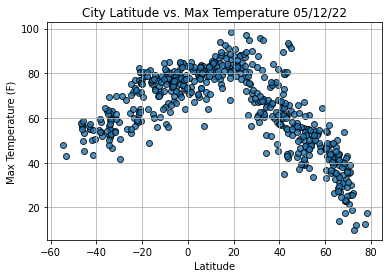

In [46]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

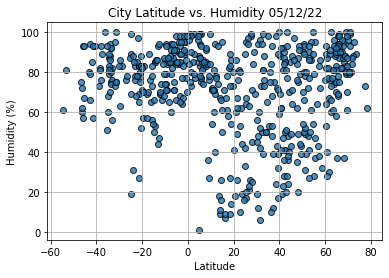

In [47]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

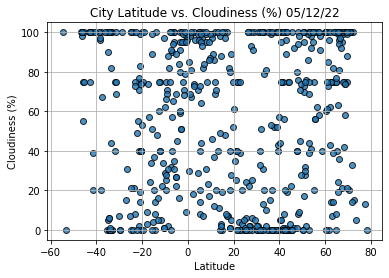

In [48]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

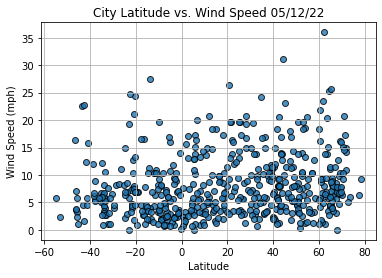

In [49]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [50]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

NameError: name 'x_values' is not defined

In [51]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()